In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2

In [5]:
Dx = lambda x,y,h=1e-5: (f2(x+h,y)-f2(x-h,y))/(2*h)
Dy = lambda x,y,h=1e-5: (f2(x,y+h)-f2(x,y-h))/(2*h)

In [6]:
x0,y0 = 0.5,0.1

In [9]:
D = lambda x,y: np.array([Dx(x,y),Dy(x,y)])

In [10]:
D(x0,y0)

array([-1.1  ,  1.604])

In [18]:
u = lambda theta: np.array([np.cos(theta),np.sin(theta)])
theta = 0.75*np.pi
u(theta)

array([-0.70710678,  0.70710678])

In [19]:
def GetDerivative(x,y,theta):
    return np.dot(D(x,y),u(theta))

In [20]:
GetDerivative(x0,y0,theta)

1.9120167362150133

In [25]:
def Minimizer(f, N = 200, gamma = 0.05):
    
    r = np.zeros((N,2))
    r[0] = np.random.uniform(-3,3,size=2)
    
    for i in range(1,N):
        r[i] = r[i-1] - gamma*D(r[i,0],r[i,1])
    
    return r

In [29]:
r = Minimizer(f2)
r[-1]

array([ 0.50524567, -2.8962878 ])

<IPython.core.display.Javascript object>


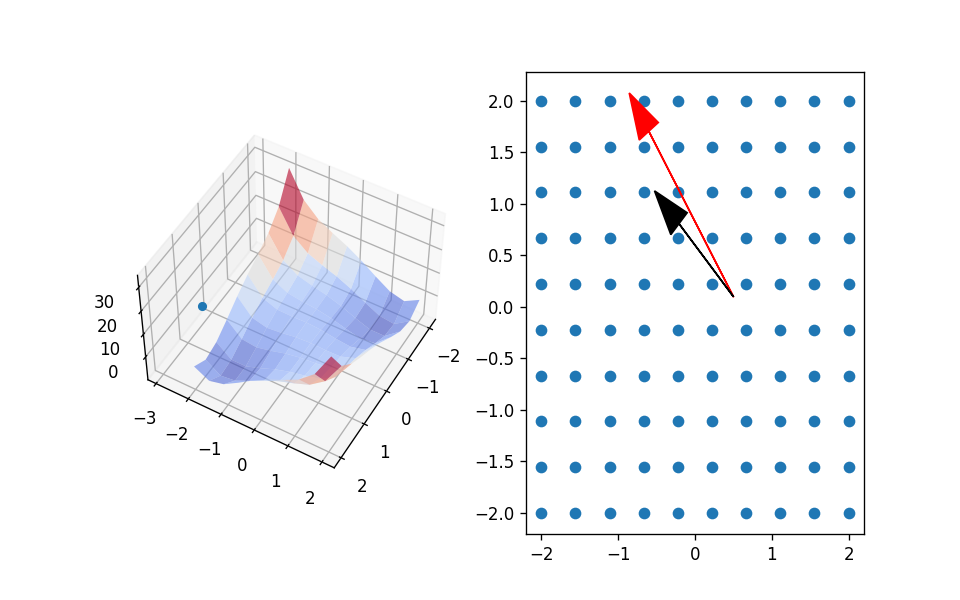

In [30]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 50, azim = 30)
ax1 = fig.add_subplot(1,2,2)

x = np.linspace(-2,2,10)
y = np.linspace(-2,2,10)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.6)
ax1.scatter(X,Y)
ax.scatter([r[-1][0]],[r[-1][1]])
#ax1.contour(X,Y,f2(X,Y))
ax1.arrow(x0,y0,D(x0,y0)[0],D(x0,y0)[1],color='r',head_width=0.3)
ax1.arrow(x0,y0,u(theta)[0],u(theta)[1],color='k',head_width=0.3)